In [17]:
from importlib import reload
from src import parsing
from src import model_path
from src import models_path
from src import model_goal
from src import models_goal
from src import inception
from src import model_interface
from src import visualization
from src import util
from src import config
reload(parsing)
reload(model_path)
reload(models_path)
reload(model_goal)
reload(models_goal)
reload(inception)
reload(model_interface)
reload(visualization)
reload(util)
reload(config)

import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import shelve
import statistics

In [2]:
## define the models paths and names
# cnn baseline
model_cnn_name = 'cnn'
model_cnn_path = ('path_cnn_a', 'cnn')
model_cnn_path_goal = ('path_cnn_goal_a', 'cnn with destinations')
model_cnn_path_dropout = ('path_cnn_droput_a', 'bayesian cnn')
model_cnn_path_dropout_goal = ('path_cnn_goal_dropout_a', 'bayesian cnn with destinations')
# transformer
model_tf_name = 'transformer'
model_tf_path = ('path_transformerk_l', 'transformer')
model_tf_path_dropout = ('path_transformerk_dropout_a', 'bayesian transformer')
model_tf_path_dropout_goal = ('path_transformerk_goal_dropout_a', 'bayesian transformer with destinations')

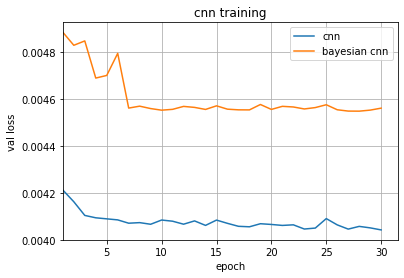

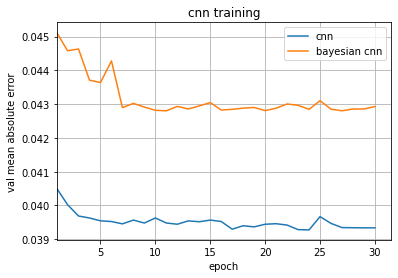

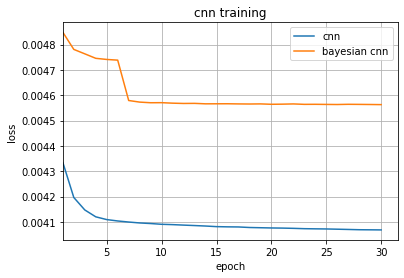

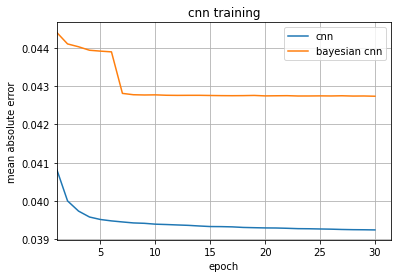

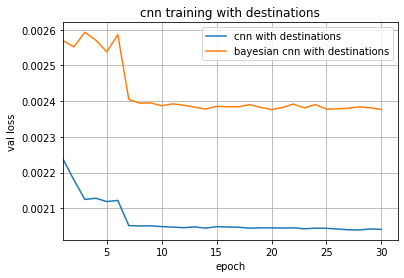

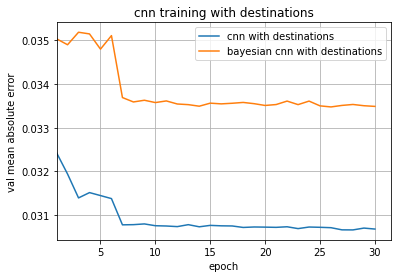

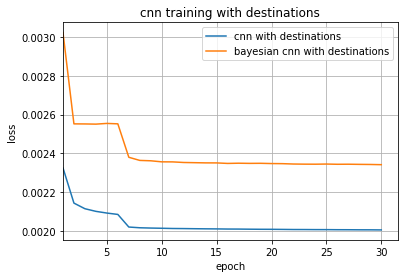

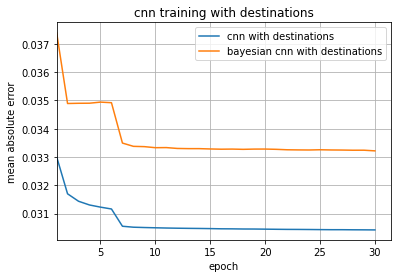

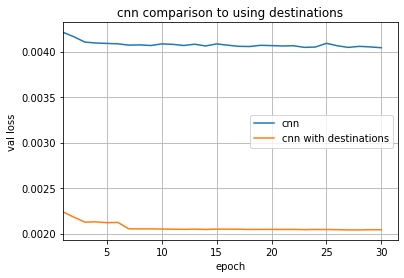

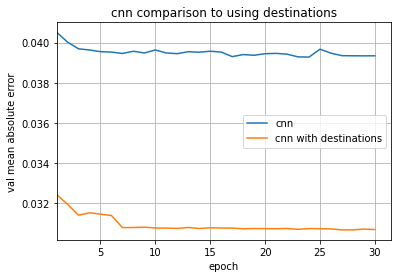

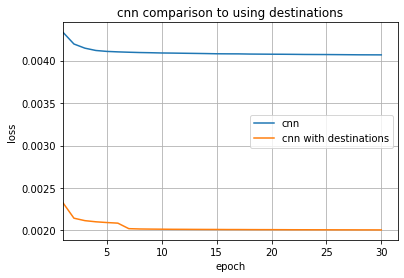

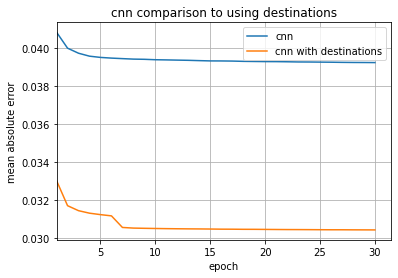

In [18]:
## plot training comparisons
def draw_comparison(name, model_designations):
    model_name_list = []
    model_path_list = []

    for model in model_designations:
        model_path_list.append(model[0])
        model_name_list.append(model[1])

    # load histories
    history_dicts = []
    for history_file in model_path_list:
        history_dicts.append(model_interface.load_history(history_file, is_goal=False))

    save_path_prefix = f"{name}_"

    visualization.draw_histories(
        "val_loss",
        "val loss",
        graph_name = name,
        save_file = f'{save_path_prefix}path_comparison_val_loss',
        names = model_name_list,
        history_dicts = history_dicts,
    )

    visualization.draw_histories(
        "val_mean_absolute_error",
        "val mean absolute error",
        graph_name = name,
        save_file = f'{save_path_prefix}path_comparison_val_mean_absolute_error',
        names = model_name_list,
        history_dicts = history_dicts,
    )

    visualization.draw_histories(
        "loss",
        "loss",
        graph_name = name,
        save_file = f'{save_path_prefix}path_comparison_loss',
        names = model_name_list,
        history_dicts = history_dicts,
    )

    visualization.draw_histories(
        "mean_absolute_error",
        "mean absolute error",
        graph_name = name,
        save_file = f'{save_path_prefix}goal_comparison_mean_absolute_error',
        names = model_name_list,
        history_dicts = history_dicts,
    )

draw_comparison('cnn training', [model_cnn_path, model_cnn_path_dropout])
draw_comparison('cnn training with destinations', [model_cnn_path_goal, model_cnn_path_dropout_goal])
draw_comparison('cnn comparison to using destinations', [model_cnn_path, model_cnn_path_goal])

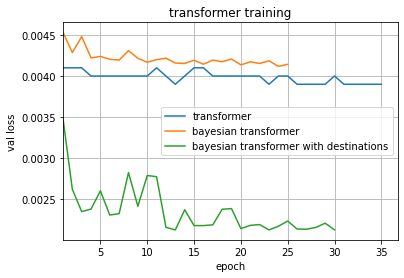

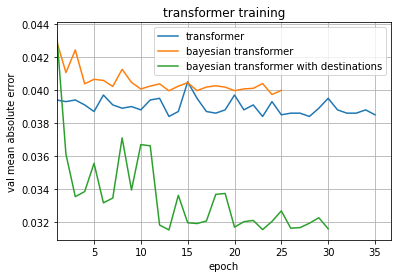

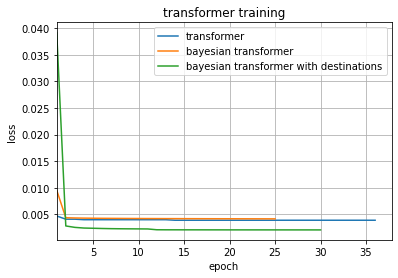

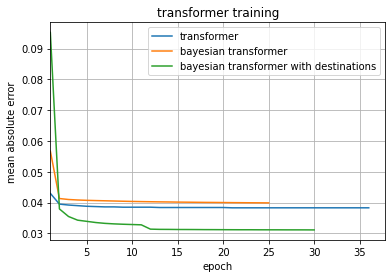

In [19]:
draw_comparison('transformer training', [model_tf_path, model_tf_path_dropout, model_tf_path_dropout_goal])

In [3]:
# load unused data for testing
# ratio = 1.0
ratio = 0.001
train_data, eval_data, test_data = parsing.load_processed_data("part1_days_08_to_10", ratio=ratio)
# combine train and eval data into test data
test_data = parsing.unite_data( [train_data, eval_data] )
train_data = None
eval_data = None

In [24]:
# generate some example predictions
reload(visualization)
save_figures = True
random_index_amount = 5
selections_per_index = 2

example_amount = test_data[0].shape[0]
choice_indices = [random.randint(0, example_amount-1) for _ in range(random_index_amount)]

print(choice_indices)

[2189120, 5195162, 4193947, 2067740, 4961790]


In [ ]:
# cnn path
m = model_path.ModelPath(uses_goal=False)
m.load('path_cnn_a')
m = None
for i in choice_indices:
    visualization.draw_path_batch(
        name="cnn",
        x=test_data[0],
        ground_truth=test_data[2],
        prediction_model=m,
        skip=i,
        n=selections_per_index,
        save=save_figures,
    )


    # draw_path(x, ground_truth, predictions=None, goal=None, name=None, min_goal_percent=0.05, legend=True):

In [ ]:
# cnn goal
m = model_path.ModelPath(uses_goal=True)
m.load('path_cnn_goal_a')
m = None
for i in choice_indices:
    visualization.draw_path_batch(
        name="cnn with destinations",
        x=test_data[0],
        ground_truth=test_data[2],
        goals=test_data[1],
        prediction_model=m,
        skip=i,
        n=selections_per_index,
        save=save_figures,
    )

In [ ]:
# transformer
m = model_path.ModelPath(uses_goal=False)
m.load('path_transformerk_l')
m = None
for i in choice_indices:
    visualization.draw_path_batch(
        name="transformer",
        x=test_data[0],
        ground_truth=test_data[2],
        prediction_model=m,
        skip=i,
        n=selections_per_index,
        save=save_figures,
        conflux_strength=2.5,
        cs=80
    )

In [4]:
k_vals = [5, 20, 50]
mde_dicts = {}
fde_dicts = {}

In [13]:
# generate goal estimates

m = model_goal.ModelGoal()
m.load('goal_inception_e')
goals_estimations = m.estimate(test_data, batch_limit=5000)

1/2: 0:5000
2/2: 5000:5270


In [40]:
print(mde_dicts.keys(), fde_dicts.keys())
print(len(mde_dicts['path_cnn_a']), len(fde_dicts['path_cnn_a']))

dict_keys(['path_cnn_droput_a', 'path_transformerk_dropout_a', 'path_transformerk_goal_dropout_a', 'path_cnn_goal_dropout_a', 'path_cnn_a', 'path_cnn_goal_a', 'path_transformerk_l', 'path_cnn_goal_a_estimate', 'path_cnn_goal_dropout_a_estimate', 'path_transformerk_goal_dropout_a_estimate']) dict_keys(['path_cnn_droput_a', 'path_transformerk_dropout_a', 'path_transformerk_goal_dropout_a', 'path_cnn_goal_dropout_a', 'path_cnn_a', 'path_cnn_goal_a', 'path_transformerk_l', 'path_cnn_goal_a_estimate', 'path_cnn_goal_dropout_a_estimate', 'path_transformerk_goal_dropout_a_estimate'])
5270 5270


In [7]:
# generate geometric metrics for simple cnn
data_length = test_data[0].shape[0]

model_name = 'path_cnn_a'
mde_dicts[model_name] = []
fde_dicts[model_name] = []
m = model_path.ModelPath(uses_goal=False)
m.load(model_name)
for i in tqdm(range(data_length)):
    input_path = test_data[0][i]
    gt_path = test_data[2][i]
    mde, fde = m.metrics_geometric(x=input_path, ground_truth=gt_path)
    mde_dicts[model_name].append(mde)
    fde_dicts[model_name].append(fde)

100%|██████████| 5270/5270 [00:53<00:00, 97.62it/s] 


In [15]:
# generate geometric metrics for goal cnn
model_name = 'path_cnn_goal_a'
mde_dicts[model_name] = []
fde_dicts[model_name] = []
m = model_path.ModelPath(uses_goal=True)
m.load(model_name)
for i in tqdm(range(data_length)):
    input_path = test_data[0][i]
    gt_path = test_data[2][i]
    goal = test_data[1][i]
    mde, fde = m.metrics_geometric(x=input_path, ground_truth=gt_path, goal=goal)
    mde_dicts[model_name].append(mde)
    fde_dicts[model_name].append(fde)

100%|██████████| 5270/5270 [00:52<00:00, 99.99it/s] 


In [21]:
# generate geometric metrics for goal cnn
model_name = 'path_cnn_goal_dropout_a'
mde_dicts[model_name] = {}
fde_dicts[model_name] = {}

m = model_path.ModelPath(uses_goal=True)
m.load(model_name)
for k in k_vals:
    print(f"k: {k}")
    mde_dicts[model_name][k] = []
    fde_dicts[model_name][k] = []
    for i in tqdm(range(data_length)):
        input_path = test_data[0][i]
        gt_path = test_data[2][i]
        goal = test_data[1][i]
        mde, fde = m.metrics_probabilistic(x=input_path, ground_truth=gt_path, goal=goal, samples=k)
        mde_dicts[model_name][k].append(mde)
        fde_dicts[model_name][k].append(fde)

  0%|          | 2/5270 [00:00<04:35, 19.15it/s]

k: 5


  0%|          | 1/5270 [00:00<17:15,  5.09it/s]

k: 20


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 50


100%|██████████| 5270/5270 [42:35<00:00,  2.06it/s]


In [10]:
model_name = 'path_transformerk_l'
mde_dicts[model_name] = []
fde_dicts[model_name] = []
m = model_path.ModelPath(uses_goal=False)
m.load(model_name)
for i in tqdm(range(data_length)):
    input_path = test_data[0][i]
    gt_path = test_data[2][i]
    mde, fde = m.metrics_geometric(x=input_path, ground_truth=gt_path)
    mde_dicts[model_name].append(mde)
    fde_dicts[model_name].append(fde)

100%|██████████| 5270/5270 [01:01<00:00, 86.29it/s]


In [16]:
# generate geometric metrics for goal cnn
model_name = 'path_cnn_droput_a'
mde_dicts[model_name] = {}
fde_dicts[model_name] = {}

m = model_path.ModelPath(uses_goal=False)
m.load(model_name)
for k in k_vals:
    print(f"k: {k}")
    mde_dicts[model_name][k] = []
    fde_dicts[model_name][k] = []
    for i in tqdm(range(data_length)):
        input_path = test_data[0][i]
        gt_path = test_data[2][i]
        mde, fde = m.metrics_probabilistic(x=input_path, ground_truth=gt_path, samples=k)
        mde_dicts[model_name][k].append(mde)
        fde_dicts[model_name][k].append(fde)

  0%|          | 2/5270 [00:00<04:38, 18.91it/s]

k: 5


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 20


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 50


100%|██████████| 5270/5270 [41:57<00:00,  2.09it/s]


In [18]:
# generate geometric metrics for goal cnn
model_name = 'path_transformerk_dropout_a'
mde_dicts[model_name] = {}
fde_dicts[model_name] = {}

m = model_path.ModelPath(uses_goal=False)
m.load(model_name)
for k in k_vals:
    print(f"k: {k}")
    mde_dicts[model_name][k] = []
    fde_dicts[model_name][k] = []
    for i in tqdm(range(data_length)):
        input_path = test_data[0][i]
        gt_path = test_data[2][i]
        mde, fde = m.metrics_probabilistic(x=input_path, ground_truth=gt_path, samples=k)
        mde_dicts[model_name][k].append(mde)
        fde_dicts[model_name][k].append(fde)

  0%|          | 1/5270 [00:00<09:28,  9.26it/s]

k: 5


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 20


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 50


100%|██████████| 5270/5270 [48:01<00:00,  1.83it/s]


In [19]:
# generate geometric metrics for goal cnn
model_name = 'path_transformerk_goal_dropout_a'
mde_dicts[model_name] = {}
fde_dicts[model_name] = {}

m = model_path.ModelPath(uses_goal=True)
m.load(model_name)
for k in k_vals:
    print(f"k: {k}")
    mde_dicts[model_name][k] = []
    fde_dicts[model_name][k] = []
    for i in tqdm(range(data_length)):
        input_path = test_data[0][i]
        gt_path = test_data[2][i]
        goal = test_data[1][i]
        mde, fde = m.metrics_probabilistic(x=input_path, ground_truth=gt_path, goal=goal, samples=k)
        mde_dicts[model_name][k].append(mde)
        fde_dicts[model_name][k].append(fde)

  0%|          | 1/5270 [00:00<15:30,  5.66it/s]

k: 5


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 20


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 50


100%|██████████| 5270/5270 [46:44<00:00,  1.88it/s]


In [16]:
# CNN goal with estimate
model_name = 'path_cnn_goal_a_estimate'
mde_dicts[model_name] = []
fde_dicts[model_name] = []
m = model_path.ModelPath(uses_goal=True)
m.load('path_cnn_goal_a')
for i in tqdm(range(data_length)):
    input_path = test_data[0][i]
    gt_path = test_data[2][i]
    goal = goals_estimations[i]
    mde, fde = m.metrics_geometric(x=input_path, ground_truth=gt_path, goal=goal)
    mde_dicts[model_name].append(mde)
    fde_dicts[model_name].append(fde)

100%|██████████| 5270/5270 [00:50<00:00, 103.83it/s]


In [19]:
# CNN goal with estimate
model_name = 'path_cnn_goal_dropout_a_estimate'
mde_dicts[model_name] = {}
fde_dicts[model_name] = {}

m = model_path.ModelPath(uses_goal=True)
m.load('path_cnn_goal_dropout_a')
for k in k_vals:
    print(f"k: {k}")
    mde_dicts[model_name][k] = []
    fde_dicts[model_name][k] = []
    for i in tqdm(range(data_length)):
        input_path = test_data[0][i]
        gt_path = test_data[2][i]
        goal = goals_estimations[i]
        mde, fde = m.metrics_probabilistic(x=input_path, ground_truth=gt_path, goal=goal, samples=k)
        mde_dicts[model_name][k].append(mde)
        fde_dicts[model_name][k].append(fde)

  0%|          | 2/5270 [00:00<05:02, 17.44it/s]

k: 5


  0%|          | 1/5270 [00:00<17:16,  5.08it/s]

k: 20


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 50


100%|██████████| 5270/5270 [43:55<00:00,  2.00it/s]


In [22]:
model_name = 'path_transformerk_goal_dropout_a_estimate'
mde_dicts[model_name] = {}
fde_dicts[model_name] = {}

m = model_path.ModelPath(uses_goal=True)
m.load('path_transformerk_goal_dropout_a')
for k in k_vals:
    print(f"k: {k}")
    mde_dicts[model_name][k] = []
    fde_dicts[model_name][k] = []
    for i in tqdm(range(data_length)):
        input_path = test_data[0][i]
        gt_path = test_data[2][i]
        goal = goals_estimations[i]
        mde, fde = m.metrics_probabilistic(x=input_path, ground_truth=gt_path, goal=goal, samples=k)
        mde_dicts[model_name][k].append(mde)
        fde_dicts[model_name][k].append(fde)

  0%|          | 1/5270 [00:00<10:57,  8.01it/s]

k: 5


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 20


  0%|          | 0/5270 [00:00<?, ?it/s]

k: 50


100%|██████████| 5270/5270 [55:14<00:00,  1.59it/s]


In [ ]:
print(statistics.mean(mde_dicts['path_cnn_goal_a']))
print(statistics.mean(mde_dicts['path_cnn_goal_a_estimate']))

In [41]:
# multiply all boxplots by 10 to get the values in m
for key, val in mde_dicts.items():
    print(f"{key}:")
    # for the dropout ones numerate through the k values
    if type(val) == dict:
        for k2, v2 in val.items():
            l = np.array(v2, dtype='float32') * 10
            print(f"val[{k2}] *= 10")
            val[k2] = l
    else:
        l = np.array(val, dtype='float32') * 10
        print(f"mde_dicts[{key}] *= 10")
        mde_dicts[key] = l

for key, val in fde_dicts.items():
    print(f"{key}:")
    # for the dropout ones numerate through the k values
    if type(val) == dict:
        for k2, v2 in val.items():
            l = np.array(v2, dtype='float32') * 10
            print(f"val[{k2}] *= 10")
            val[k2] = l
    else:
        l = np.array(val, dtype='float32') * 10
        print(f"fde_dicts[{key}] *= 10")
        fde_dicts[key] = l

path_cnn_droput_a:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_transformerk_dropout_a:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_transformerk_goal_dropout_a:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_cnn_goal_dropout_a:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_cnn_a:
mde_dicts[path_cnn_a] *= 10
path_cnn_goal_a:
mde_dicts[path_cnn_goal_a] *= 10
path_transformerk_l:
mde_dicts[path_transformerk_l] *= 10
path_cnn_goal_a_estimate:
mde_dicts[path_cnn_goal_a_estimate] *= 10
path_cnn_goal_dropout_a_estimate:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_transformerk_goal_dropout_a_estimate:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_cnn_droput_a:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_transformerk_dropout_a:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_transformerk_goal_dropout_a:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_cnn_goal_dropout_a:
val[5] *= 10
val[20] *= 10
val[50] *= 10
path_cnn_a:
fde_dicts[path_cnn_a] *= 10
path_cnn_goal_a:
fde_dicts[path_cnn_goal_a]

In [43]:
with shelve.open('mde_fde.shelve') as db:
    db['mde'] = mde_dicts
    db['fde'] = fde_dicts

In [58]:
# load from shelve
k_vals = [5, 20, 50]
mde_dicts = {}
fde_dicts = {}
with shelve.open('mde_fde.shelve') as db:
    mde_dicts = db['mde']
    fde_dicts = db['fde']

In [59]:
## calculate metrics mde
for model, val in mde_dicts.items():
    print(f"{model}:")
    if type(val) == dict:
        for k, v2 in val.items():
            m = statistics.mean(v2)
            print(f"\t{k}: {m:.3f}")
    else:
        m = statistics.mean(val)
        print(f"\t{m:.3f}")

path_cnn_a:
	0.606
path_cnn_droput_a:
	5: 0.523
	20: 0.451
	50: 0.417
path_cnn_goal_a:
	0.467
path_cnn_goal_a_estimate:
	0.543
path_cnn_goal_dropout_a:
	5: 0.407
	20: 0.355
	50: 0.329
path_cnn_goal_dropout_a_estimate:
	5: 0.693
	20: 0.670
	50: 0.657
path_transformerk_dropout_a:
	5: 0.480
	20: 0.436
	50: 0.412
path_transformerk_goal_dropout_a:
	5: 0.372
	20: 0.339
	50: 0.320
path_transformerk_goal_dropout_a_estimate:
	5: 0.434
	20: 0.376
	50: 0.343
path_transformerk_l:
	0.538


In [60]:
## calculate metrics fde
for model, val in fde_dicts.items():
    print(f"{model}:")
    if type(val) == dict:
        for k, v2 in val.items():
            m = statistics.mean(v2)
            print(f"\t{k}: {m:.3f}")
    else:
        m = statistics.mean(val)
        print(f"\t{m:.3f}")

path_cnn_a:
	1.128
path_cnn_droput_a:
	5: 0.984
	20: 0.850
	50: 0.785
path_cnn_goal_a:
	0.733
path_cnn_goal_a_estimate:
	0.986
path_cnn_goal_dropout_a:
	5: 0.625
	20: 0.528
	50: 0.482
path_cnn_goal_dropout_a_estimate:
	5: 1.299
	20: 1.255
	50: 1.231
path_transformerk_dropout_a:
	5: 0.899
	20: 0.818
	50: 0.774
path_transformerk_goal_dropout_a:
	5: 0.574
	20: 0.512
	50: 0.477
path_transformerk_goal_dropout_a_estimate:
	5: 0.923
	20: 0.813
	50: 0.750
path_transformerk_l:
	1.000


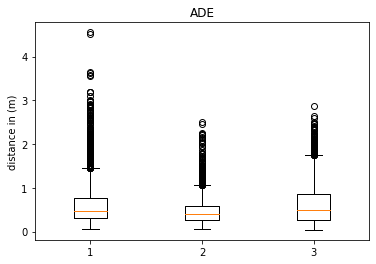

In [45]:

# TODO multiply the results by 10 to get meters
fig, ax = plt.subplots()
plt.title("ADE")
plt.boxplot( [ mde_dicts['path_cnn_a'], mde_dicts['path_cnn_goal_a'], mde_dicts['path_cnn_goal_a_estimate'] ], showfliers=True)
plt.ylabel("distance in (m)")
# ax.set_xticklabels(["sequence speed", "input speed"], rotation=45, fontsize=8)
# plt.savefig("figures/boxplot_data_speed.pdf", bbox_inches = "tight")
plt.show()

